<img src="images/arm_logo.png" width=500 alt="ARM Logo"></img>

# Bankhead National Forest - RadClss Data Object Definitions (DOD)

## Overview

The Extracted Radar Columns and In-Situ Sensors (RadClss) Value-Added Product (VAP) is
a dataset containing in-situ ground observations matched to CSAPR-2 radar columns above ARM Mobile Facility (AMF-3) supplemental sites of interest. 

To maintain standards, ARM requires Data Object Definitions for all VAP.

In [24]:
import act
import xarray as xr
import numpy as np
import glob

## Define the DOD

In [ ]:
def define_radclss_dod():
    """
    Download a Data Object Definition with ACT and modify to meet expectations

    Returns
    -------
        dod - Xarray Dataset
            Dataset containing all required parameters and attributes for RadCLss
    """
    cmac_mvc = {'attenuation_corrected_differential_reflectivity' : {'dtype' : np.single, '_FillValue': -32767.0},
            'attenuation_corrected_differential_reflectivity_lag_1' : {'dtype' : np.single, '_FillValue': -32767.0},
            'attenuation_corrected_reflectivity_h' : {'dtype' : np.single, '_FillValue': -32767.0},
            'corrected_velocity' : {'dtype' : np.double, '_FillValue' : -32767.0},
            'corrected_differential_phase' : {'dtype' : np.double, '_FillValue' : -32767.0},
            'filtered_corrected_differential_phase' : {'dtype' : np.double, '_FillValue' : -32767.0},
            'rain_rate_A' : {"dtype" : np.double, "_FillValue": 1e20},
            'rain_rate_Z' : {'dtype' : np.double, "_FillValue": 1e20},
            "rain_rate_Kdp" : {"dtype": np.double, "_FillValue": 1e20}
    }

    dims = {'time': 1, 'height': 32, 'station': 6}
    out_ds = act.io.arm.create_ds_from_arm_dod('csapr2radclss.c2', 
                                               dims, 
                                               version='1.0')
    
    for key in cmac_mvc:
        out_ds[key].data[out_ds[key].data == -9999] = cmac_mvc[key]['_FillValue']

    return out_ds

In [49]:
dod = define_radclss_dod()

In [50]:
dod.attrs

{'command_line': '',
 'Conventions': 'CF/Radial instrument_parameters ARM-1.3',
 'process_version': '',
 'dod_version': '',
 'input_datastreams': '',
 'site_id': '',
 'platform_id': '',
 'facility_id': '',
 'data_level': '',
 'location_description': '',
 'datastream': '',
 'institution': 'U.S. Department of Energy Atmospheric Radiation Measurement (ARM) User Facility',
 'references': 'See CSAPR2 Instrument Handbook',
 'doi': '10.5439/2278989',
 'comment': 'This is highly experimental and initial data. There are many, known and unknown issues. Please do not use before contacting the Translator responsible scollis@anl.gov',
 'attributions': 'This data is collected by the ARM User Facility. Radar system is operated by the radar engineering team radar@arm.gov and the data is processed by the precipitation radar products team. LP code courtesy of Scott Giangrande, BNL.',
 'version': '1.0',
 'vap_name': 'radclss',
 'known_issues': 'False phidp jumps in insect regions. Still uses old Giangran

In [51]:
dod

<xarray.Dataset> Size: 36kB
Dimensions:                                                (time: 1,
                                                            height: 32,
                                                            station: 6)
Coordinates:
  * time                                                   (time) int64 8B 0
  * height                                                 (height) int64 256B ...
  * station                                                (station) int64 48B ...
Data variables: (12/65)
    base_time                                              float64 8B -9.999e+03
    time_offset                                            (time) float64 8B ...
    gate_time                                              (time, height, station) float64 2kB ...
    attenuation_corrected_differential_reflectivity        (time, height, station) float64 2kB ...
    attenuation_corrected_differential_reflectivity_lag_1  (time, height, station) float64 2kB ...
    attenuation_corrected_reflectivity_h                   (time, height, station) float64 2kB ...
    ...                                                     ...
    wxt_temp_mean                                          (time, station) float64 48B ...
    wxt_precip_rate_mean                                   (time, station) float64 48B ...
    wxt_cumul_precip                                       (time, station) float64 48B ...
    lat                                                    (station) float64 48B ...
    lon                                                    (station) float64 48B ...
    alt                                                    (station) float64 48B ...
Attributes: (12/22)
    command_line:          
    Conventions:           CF/Radial instrument_parameters ARM-1.3
    process_version:       
    dod_version:           
    input_datastreams:     
    site_id:               
    ...                    ...
    version:               1.0
    vap_name:              radclss
    known_issues:          False phidp jumps in insect regions. Still uses ol...
    field_names:           attenuation_corrected_differential_reflectivity, a...
    source:                Atmospheric Radiation Measurement (ARM) program C-...
    history:

In [52]:
dod.to_netcdf("bnf-csapr2-radclss.dod.v1.28.nc")

## Correct a Processed RadCLss file

In [26]:
radclss = xr.open_dataset('/home/obrienj/git-dev/bnf-radar-examples/notebooks/data/bnf-csapr2-radclss.c2.20250524.000000.nc',
                          decode_timedelta=False)

In [27]:
radclss

<xarray.Dataset> Size: 4MB
Dimensions:                                                (time: 143,
                                                            station: 6,
                                                            height: 32)
Coordinates:
  * time                                                   (time) datetime64[ns] 1kB ...
  * height                                                 (height) int64 256B ...
  * station                                                (station) <U3 72B ...
Data variables: (12/64)
    base_time                                              (time, station) datetime64[ns] 7kB ...
    time_offset                                            (time, station, height) int64 220kB ...
    attenuation_corrected_differential_reflectivity        (time, station, height) float64 220kB ...
    attenuation_corrected_differential_reflectivity_lag_1  (time, station, height) float64 220kB ...
    attenuation_corrected_reflectivity_h                   (time, station, height) float64 220kB ...
    copol_correlation_coeff                                (time, station, height) float64 220kB ...
    ...                                                     ...
    vdisquants_total_droplet_concentration                 (station, time) float64 7kB ...
    vdisquants_mean_doppler_vel_cband20c                   (station, time) float64 7kB ...
    vdisquants_specific_differential_attenuation_cband20c  (station, time) float64 7kB ...
    lat                                                    (station) float64 48B ...
    lon                                                    (station) float64 48B ...
    alt                                                    (station) int64 48B ...
Attributes:
    distance_from_radar:    36.909 km
    azimuth:                210.709 degrees
    latitude_of_location:   34.34525 degrees
    longitude_of_location:  -87.33842 degrees

In [28]:
radclss = radclss.transpose("time", "height", "station")

In [29]:
radclss['base_time'] = radclss.isel(time=0).sel(station="M1").base_time

In [30]:
radclss['time_offset'] = radclss.time

In [31]:
radclss

<xarray.Dataset> Size: 3MB
Dimensions:                                                (time: 143,
                                                            height: 32,
                                                            station: 6)
Coordinates:
  * time                                                   (time) datetime64[ns] 1kB ...
  * height                                                 (height) int64 256B ...
  * station                                                (station) <U3 72B ...
Data variables: (12/64)
    base_time                                              datetime64[ns] 8B ...
    time_offset                                            (time) datetime64[ns] 1kB ...
    attenuation_corrected_differential_reflectivity        (time, height, station) float64 220kB ...
    attenuation_corrected_differential_reflectivity_lag_1  (time, height, station) float64 220kB ...
    attenuation_corrected_reflectivity_h                   (time, height, station) float64 220kB ...
    copol_correlation_coeff                                (time, height, station) float64 220kB ...
    ...                                                     ...
    vdisquants_total_droplet_concentration                 (time, station) float64 7kB ...
    vdisquants_mean_doppler_vel_cband20c                   (time, station) float64 7kB ...
    vdisquants_specific_differential_attenuation_cband20c  (time, station) float64 7kB ...
    lat                                                    (station) float64 48B ...
    lon                                                    (station) float64 48B ...
    alt                                                    (station) int64 48B ...
Attributes:
    distance_from_radar:    36.909 km
    azimuth:                210.709 degrees
    latitude_of_location:   34.34525 degrees
    longitude_of_location:  -87.33842 degrees

In [46]:
def adjust_radclss_dod(radclss, dod):
    """
    Adjust the RadCLss DataSet to include missing datastreams

    Parameters
    ----------
    radclss : Xarray DataSet
        extracted columns and in-situ sensor file
    dod : Xarray DataSet
        expected datastreams and data standards for RadCLss

    returns
    -------
    radclss : Xarray DataSet
        Corrected RadCLss that has all expected parmeters and attributes
    """
    # Supplied DOD has correct data attributes and all required parameters. 
    # Update the RadCLss dataset variable values with the DOD dataset. 
    for var in dod.variables:
        # Make sure the variable isn't a dimension
        if var not in dod.dims:
            # check to see if variable is within RadCLss
            # note: it may not be if file is missing.
            if var not in radclss.variables:
                print(var)
                new_size = []
                for dim in dod[var].dims:
                    if dim == "time":
                        new_size.append(radclss.sizes['time'])
                    else:
                        new_size.append(dod.sizes[dim])
                    #new_data = np.full(())
                # create a new array to hold the updated values
                new_data = np.full(new_size, dod[var].data[0])
                # create a new DataArray and add back into RadCLss
                new_array = xr.DataArray(new_data, dims=dod[var].dims)
                new_array.attrs = dod[var].attrs
                radclss[var] = new_array
                
                # clean up some saved values
                del new_size, new_data, new_array
    # update the global attributes
    radclss.drop_attrs()
    radclss.attrs = dod.attrs
    # return radclss, close DOD file
    del dod

    return radclss
   

In [47]:
radclss = adjust_radclss_dod(radclss, define_radclss_dod())

In [48]:
radclss

<xarray.Dataset> Size: 4MB
Dimensions:                                                (time: 143,
                                                            height: 32,
                                                            station: 6)
Coordinates:
  * time                                                   (time) datetime64[ns] 1kB ...
  * height                                                 (height) int64 256B ...
  * station                                                (station) <U3 72B ...
Data variables: (12/68)
    base_time                                              datetime64[ns] 8B ...
    time_offset                                            (time) datetime64[ns] 1kB ...
    attenuation_corrected_differential_reflectivity        (time, height, station) float64 220kB ...
    attenuation_corrected_differential_reflectivity_lag_1  (time, height, station) float64 220kB ...
    attenuation_corrected_reflectivity_h                   (time, height, station) float64 220kB ...
    copol_correlation_coeff                                (time, height, station) float64 220kB ...
    ...                                                     ...
    lon                                                    (station) float64 48B ...
    alt                                                    (station) int64 48B ...
    test_variable                                          (time, height, station) float64 220kB ...
    wxt_temp_mean                                          (time, station) float64 7kB ...
    wxt_precip_rate_mean                                   (time, station) float64 7kB ...
    wxt_cumul_precip                                       (time, station) float64 7kB ...
Attributes: (12/22)
    command_line:          
    Conventions:           CF/Radial instrument_parameters ARM-1.3
    process_version:       
    dod_version:           
    input_datastreams:     
    site_id:               
    ...                    ...
    version:               1.0
    vap_name:              radclss
    known_issues:          False phidp jumps in insect regions. Still uses ol...
    field_names:           attenuation_corrected_differential_reflectivity, a...
    source:                Atmospheric Radiation Measurement (ARM) program C-...
    history:

In [45]:
radclss.drop_attrs()

<xarray.Dataset> Size: 4MB
Dimensions:                                                (time: 143,
                                                            height: 32,
                                                            station: 6)
Coordinates:
  * time                                                   (time) datetime64[ns] 1kB ...
  * height                                                 (height) int64 256B ...
  * station                                                (station) <U3 72B ...
Data variables: (12/68)
    base_time                                              datetime64[ns] 8B ...
    time_offset                                            (time) datetime64[ns] 1kB ...
    attenuation_corrected_differential_reflectivity        (time, height, station) float64 220kB ...
    attenuation_corrected_differential_reflectivity_lag_1  (time, height, station) float64 220kB ...
    attenuation_corrected_reflectivity_h                   (time, height, station) float64 220kB ...
    copol_correlation_coeff                                (time, height, station) float64 220kB ...
    ...                                                     ...
    lon                                                    (station) float64 48B ...
    alt                                                    (station) int64 48B ...
    test_variable                                          (time, height, station) float64 220kB ...
    wxt_temp_mean                                          (time, station) float64 7kB ...
    wxt_precip_rate_mean                                   (time, station) float64 7kB ...
    wxt_cumul_precip                                       (time, station) float64 7kB ...

In [55]:
dod.attrs

{'command_line': '',
 'Conventions': 'CF/Radial instrument_parameters ARM-1.3',
 'process_version': '',
 'dod_version': '',
 'input_datastreams': '',
 'site_id': '',
 'platform_id': '',
 'facility_id': '',
 'data_level': '',
 'location_description': '',
 'datastream': '',
 'institution': 'U.S. Department of Energy Atmospheric Radiation Measurement (ARM) User Facility',
 'references': 'See CSAPR2 Instrument Handbook',
 'doi': '10.5439/2278989',
 'comment': 'This is highly experimental and initial data. There are many, known and unknown issues. Please do not use before contacting the Translator responsible scollis@anl.gov',
 'attributions': 'This data is collected by the ARM User Facility. Radar system is operated by the radar engineering team radar@arm.gov and the data is processed by the precipitation radar products team. LP code courtesy of Scott Giangrande, BNL.',
 'version': '1.0',
 'vap_name': 'radclss',
 'known_issues': 'False phidp jumps in insect regions. Still uses old Giangran

In [56]:
import datetime

In [59]:
dod.attrs['history'] = ("created by user jrobrien on machine cumulus.ccs.ornl.gov at " + 
                                 str(datetime.datetime.now()) +
                                " using Py-ART and ACT"
    )

In [60]:
dod.attrs['history']

'created by user jrobrien on machine cumulus.ccs.ornl.gov at 2025-07-25 18:14:56.753726 using Py-ART and ACT'

In [61]:
rad_scr = xr.open_dataset('/home/obrienj/git-dev/bnf-radar-examples/scripts/202505/bnfcsapr2radclssS3.c2.20250524.000000.nc')

In [62]:
rad_scr

<xarray.Dataset> Size: 8MB
Dimensions:                                                (time: 143,
                                                            height: 32,
                                                            station: 6)
Coordinates:
  * time                                                   (time) datetime64[ns] 1kB ...
  * height                                                 (height) int64 256B ...
  * station                                                (station) <U3 72B ...
Data variables: (12/78)
    base_time                                              datetime64[ns] 8B ...
    time_offset                                            (time) datetime64[ns] 1kB ...
    gate_time                                              (time, station) datetime64[ns] 7kB ...
    attenuation_corrected_differential_reflectivity        (time, height, station) float64 220kB ...
    attenuation_corrected_differential_reflectivity_lag_1  (time, height, station) float64 220kB ...
    attenuation_corrected_reflectivity_h                   (time, height, station) float64 220kB ...
    ...                                                     ...
    vdisquants_mean_doppler_vel_cband20c                   (time, station) float64 7kB ...
    vdisquants_specific_differential_attenuation_cband20c  (time, station) float64 7kB ...
    wxt_temp_mean                                          (time, station) float64 7kB ...
    lat                                                    (station) float64 48B ...
    lon                                                    (station) float64 48B ...
    alt                                                    (station) int64 48B ...
Attributes: (12/23)
    command_line:          python bnf_radclss.py --serial True --array True
    Conventions:           CF/Radial instrument_parameters ARM-1.3
    process_version:       
    dod_version:           csapr2radclss-c2-1.28
    input_datastreams:     ['bnfcsapr2cmacS3.c1', 'bnfmetM1.b1', 'bnfmetS20.b...
    site_id:               bnf
    ...                    ...
    vap_name:              
    known_issues:          False phidp jumps in insect regions. Still uses ol...
    field_names:           attenuation_corrected_differential_reflectivity, a...
    source:                Atmospheric Radiation Measurement (ARM) program C-...
    history:               created by user jrobrien on machine cumulus.ccs.or...
    location_descrption:   Southeast U.S. in Bankhead National Forest (BNF), ...

In [68]:
import matplotlib.pyplot as plt
import cmweather

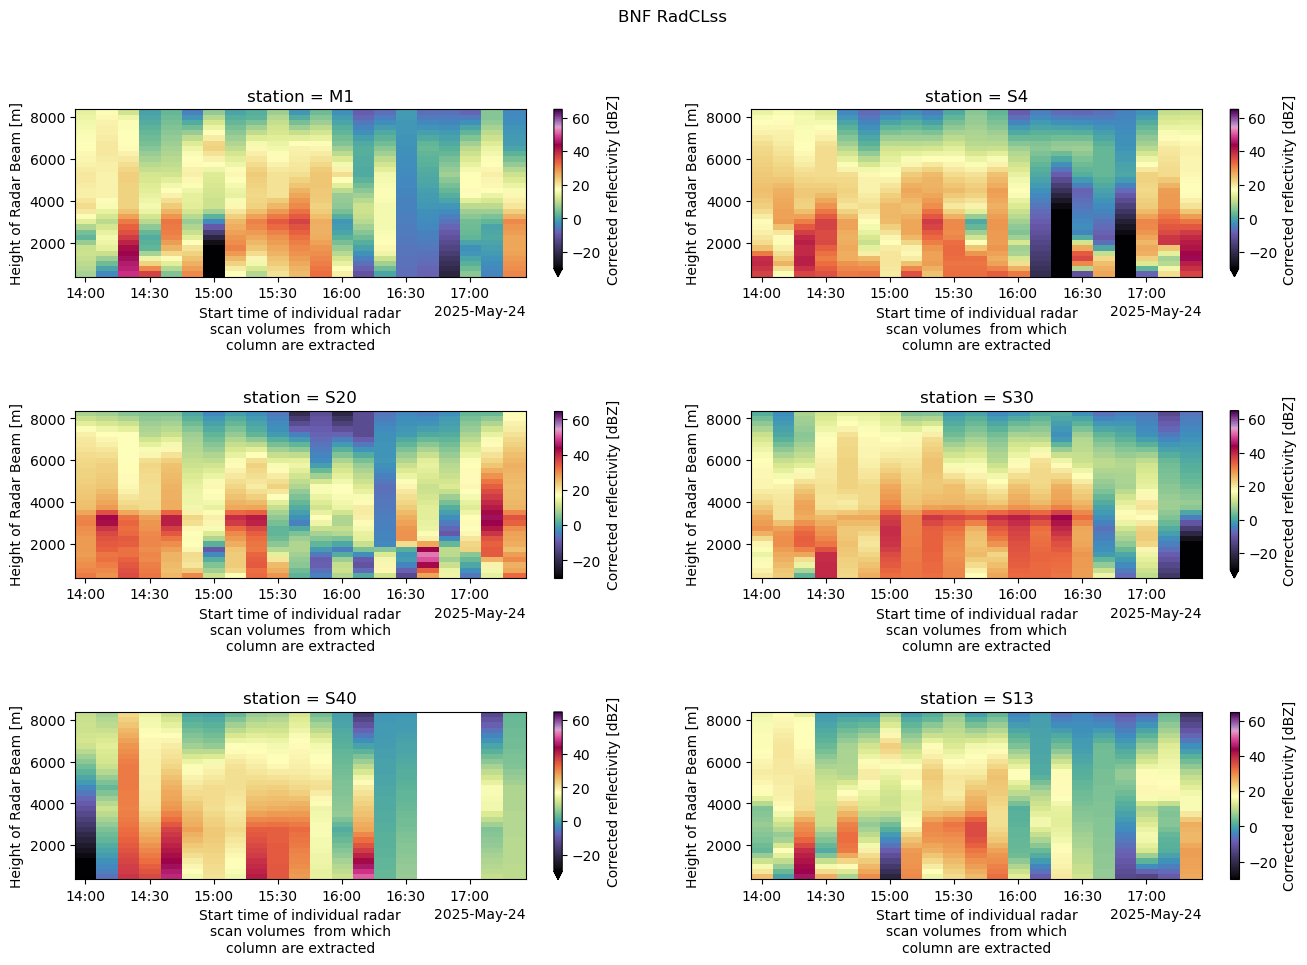

In [69]:
fig, axarr = plt.subplots(3, 2, figsize=[16, 10])
plt.subplots_adjust(hspace=0.8)

fig.suptitle("BNF RadCLss ")

rad_scr.sel(station="M1").sel(time=slice("2025-05-24T14:00:00", "2025-05-24T17:30:00")).corrected_reflectivity.plot(y="height", ax=axarr[0, 0], vmin=-30, vmax=65, cmap="ChaseSpectral")
rad_scr.sel(station="S4").sel(time=slice("2025-05-24T14:00:00", "2025-05-24T17:30:00")).corrected_reflectivity.plot(y="height", ax=axarr[0, 1], vmin=-30, vmax=65, cmap="ChaseSpectral")
rad_scr.sel(station="S20").sel(time=slice("2025-05-24T14:00:00", "2025-05-24T17:30:00")).corrected_reflectivity.plot(y="height", ax=axarr[1, 0], vmin=-30, vmax=65, cmap="ChaseSpectral")
rad_scr.sel(station="S30").sel(time=slice("2025-05-24T14:00:00", "2025-05-24T17:30:00")).corrected_reflectivity.plot(y="height", ax=axarr[1, 1], vmin=-30, vmax=65, cmap="ChaseSpectral")
rad_scr.sel(station="S40").sel(time=slice("2025-05-24T14:00:00", "2025-05-24T17:30:00")).corrected_reflectivity.plot(y="height", ax=axarr[2, 0], vmin=-30, vmax=65, cmap="ChaseSpectral")
rad_scr.sel(station="S13").sel(time=slice("2025-05-24T14:00:00", "2025-05-24T17:30:00")).corrected_reflectivity.plot(y="height", ax=axarr[2, 1], vmin=-30, vmax=65, cmap="ChaseSpectral")

In [70]:
rad_scr

<xarray.Dataset> Size: 8MB
Dimensions:                                                (time: 143,
                                                            height: 32,
                                                            station: 6)
Coordinates:
  * time                                                   (time) datetime64[ns] 1kB ...
  * height                                                 (height) int64 256B ...
  * station                                                (station) <U3 72B ...
Data variables: (12/78)
    base_time                                              datetime64[ns] 8B ...
    time_offset                                            (time) datetime64[ns] 1kB ...
    gate_time                                              (time, station) datetime64[ns] 7kB ...
    attenuation_corrected_differential_reflectivity        (time, height, station) float64 220kB ...
    attenuation_corrected_differential_reflectivity_lag_1  (time, height, station) float64 220kB ...
    attenuation_corrected_reflectivity_h                   (time, height, station) float64 220kB ...
    ...                                                     ...
    vdisquants_mean_doppler_vel_cband20c                   (time, station) float64 7kB ...
    vdisquants_specific_differential_attenuation_cband20c  (time, station) float64 7kB ...
    wxt_temp_mean                                          (time, station) float64 7kB ...
    lat                                                    (station) float64 48B ...
    lon                                                    (station) float64 48B ...
    alt                                                    (station) int64 48B ...
Attributes: (12/23)
    command_line:          python bnf_radclss.py --serial True --array True
    Conventions:           CF/Radial instrument_parameters ARM-1.3
    process_version:       
    dod_version:           csapr2radclss-c2-1.28
    input_datastreams:     ['bnfcsapr2cmacS3.c1', 'bnfmetM1.b1', 'bnfmetS20.b...
    site_id:               bnf
    ...                    ...
    vap_name:              
    known_issues:          False phidp jumps in insect regions. Still uses ol...
    field_names:           attenuation_corrected_differential_reflectivity, a...
    source:                Atmospheric Radiation Measurement (ARM) program C-...
    history:               created by user jrobrien on machine cumulus.ccs.or...
    location_descrption:   Southeast U.S. in Bankhead National Forest (BNF), ...